哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [128]:
import pandas as pd 

In [129]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
A_lvr_land_A=pd.read_csv("A_lvr_land_A.csv")
B_lvr_land_A=pd.read_csv("B_lvr_land_A.csv")
E_lvr_land_A=pd.read_csv("E_lvr_land_A.csv")
F_lvr_land_A=pd.read_csv("F_lvr_land_A.csv")

c:\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [130]:
A_lvr_land_A.head()

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
0,The villages and towns urban district,transaction sign,land sector position building sector house num...,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,...,the unit price (NTD / square meter),the berth category,berth shifting total area square meter,the berth total price NTD,the note,serial number,NaN,NaN,NaN,NaN
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,156583,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,149558,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,181472,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,299450,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN


In [131]:
B_lvr_land_A.head()

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
0,The villages and towns urban district,transaction sign,land sector position building sector house num...,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,...,the unit price (NTD / square meter),the berth category,berth shifting total area square meter,the berth total price NTD,the note,serial number,NaN,NaN,NaN,NaN
1,西區,房地(土地+建物),臺中市西區美村路一段181~210號,28.34,住,NaN,NaN,1090331,土地1建物1車位0,五層,...,52925,NaN,0.0,0,NaN,RPVOMLLKNHPFFAB18CA,104.80,18.34,0.0,NaN
2,西區,房地(土地+建物),臺中市西區梅川西路一段91~120號,52.0,住,NaN,NaN,1090331,土地1建物1車位0,全,...,114379,NaN,0.0,0,NaN,RPPNMLMKNHPFFAB57CA,91.80,0.00,0.0,NaN
3,南區,房地(土地+建物)+車位,臺中市南區建國南路一段211~240號,23.4,住,NaN,NaN,1090418,土地1建物1車位1,十一層,...,68162,坡道平面,24.05,0,NaN,RPUNMLMKNHPFFAB08CA,110.26,19.34,0.0,NaN
4,西區,房地(土地+建物),臺中市西區東興路三段91~120號,84.0,住,NaN,NaN,1090403,土地1建物1車位0,全,...,118142,NaN,0.0,0,NaN,RPSOMLMKNHPFFAB97CA,211.61,0.00,0.0,NaN


In [132]:
E_lvr_land_A.head()

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
0,The villages and towns urban district,transaction sign,land sector position building sector house num...,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,...,the unit price (NTD / square meter),the berth category,berth shifting total area square meter,the berth total price NTD,the note,serial number,NaN,NaN,NaN,NaN
1,鼓山區,房地(土地+建物)+車位,高雄市鼓山區明倫路121~150號,17.2,商,NaN,NaN,1090221,土地1建物2車位1,一層，二層，騎樓,...,137122,升降機械,0.0,0,NaN,RPTNMLLKNHPFFAE18CA,139.45,4.14,0.0,NaN
2,鼓山區,房地(土地+建物)+車位,高雄市鼓山區昌盛路1~30號,7.55,商,NaN,NaN,1090410,土地1建物1車位1,七層,...,66133,坡道機械,0.0,800000,NaN,RPVNMLLKNHPFFAE38CA,46.55,6.41,0.0,NaN
3,鹽埕區,建物,高雄市鹽埕區北斗街1~30號,0.0,NaN,NaN,NaN,1090511,土地0建物1車位0,九層,...,13578,NaN,0.0,0,NaN,RPUNMLMKNHPFFAE38CA,33.22,1.85,0.0,NaN
4,鹽埕區,建物,高雄市鹽埕區大義街91~120號,0.0,NaN,NaN,NaN,1081216,土地0建物1車位0,三層,...,5042,NaN,0.0,0,NaN,RPUNMLOKNHPFFAE58CA,26.85,0.00,0.0,NaN


In [133]:
F_lvr_land_A.head()

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
0,The villages and towns urban district,transaction sign,land sector position building sector house num...,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,...,the unit price (NTD / square meter),the berth category,berth shifting total area square meter,the berth total price NTD,the note,serial number,NaN,NaN,NaN,NaN
1,板橋區,房地(土地+建物),新北市板橋區南雅東路1~30號,9.76,商,NaN,NaN,1090405,土地2建物1車位0,六層,...,125589,NaN,0.0,0,含增建或未登記建物。;,RPQNMLMKNHPFFAF08CA,47.45,0.0,8.10,NaN
2,板橋區,房地(土地+建物)+車位,新北市板橋區縣民大道三段270巷1~30號,24.18,工,NaN,NaN,1090401,土地1建物1車位1,八層,...,113039,坡道平面,38.09,0,含增建或未登記建物。;,RPRNMLMKNHPFFAF18CA,116.29,0.0,11.80,NaN
3,板橋區,房地(土地+建物),新北市板橋區南雅南路一段1~30號,3.2,商,NaN,NaN,1090316,土地1建物1車位0,十一層,...,99489,NaN,0.0,0,含增建或未登記建物。;,RPTNMLMKNHPFFAF38CA,23.02,0.0,4.94,NaN
4,板橋區,房地(土地+建物),新北市板橋區金門街103巷1~30號,32.58,住,NaN,NaN,1090410,土地2建物1車位0,二層,...,88944,NaN,0.0,0,含增建或未登記建物。;,RPSNMLNKNHPFFAF38CA,80.55,0.0,16.14,NaN


In [134]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
dfa=A_lvr_land_A.drop([0])
dfb=B_lvr_land_A.drop([0])
dfe=E_lvr_land_A.drop([0])
dff=F_lvr_land_A.drop([0])

In [135]:
dfa.head()  #刪除成功!!
dfa.info()
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8841 entries, 1 to 8841
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   鄉鎮市區           8841 non-null   object 
 1   交易標的           8841 non-null   object 
 2   土地區段位置建物區段門牌   8841 non-null   object 
 3   土地移轉總面積平方公尺    8841 non-null   object 
 4   都市土地使用分區       8750 non-null   object 
 5   非都市土地使用分區      0 non-null      object 
 6   非都市土地使用編定      0 non-null      object 
 7   交易年月日          8841 non-null   object 
 8   交易筆棟數          8841 non-null   object 
 9   移轉層次           7764 non-null   object 
 10  總樓層數           7755 non-null   object 
 11  建物型態           8841 non-null   object 
 12  主要用途           7588 non-null   object 
 13  主要建材           7763 non-null   object 
 14  建築完成年月         7321 non-null   object 
 15  建物移轉總面積平方公尺    8841 non-null   object 
 16  建物現況格局-房       8841 non-null   object 
 17  建物現況格局-廳       8841 non-null   object 
 18  建物現況格局-衛

In [136]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)

dfa.insert(0,'城市','台北市')
dff.insert(0,'城市','新北市')
dfb.insert(0,'城市','台中市')
dfe.insert(0,'城市','高雄市')

In [137]:
#4. 將以上四份資料運用pd.concat()串接

df=pd.concat([dfa,dff,dfb,dfe],axis=0)

In [138]:
display(df)

,城市,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
1,台北市,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,...,156583,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN
2,台北市,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,...,149558,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN
3,台北市,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,...,181472,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN
4,台北市,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,...,299450,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN
5,台北市,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,...,147825,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14129,高雄市,三民區,房地(土地+建物),建興路380巷1弄1~30號,32.0,其他,NaN,NaN,1090727,土地1建物1車位0,...,30408,NaN,0.0,0,NaN,RPSPMLLLQHPFFDE09DA,101.29,0.00,7.12,NaN
14130,高雄市,三民區,房地(土地+建物)+車位,民族巷1~30號,7.01,其他,NaN,NaN,1090816,土地1建物1車位1,...,61056,坡道平面,6.25,800000,NaN,RPPQMLKLQHPFFDE78DA,51.16,9.73,0.00,NaN
14131,高雄市,三民區,房地(土地+建物)+車位,大豐一路331~360號,27.23,其他,NaN,NaN,1090722,土地1建物1車位1,...,39386,坡道機械,0.0,0,NaN,RPSOMLSKQHPFFDE96DA,101.03,6.24,0.00,NaN
14132,高雄市,三民區,房地(土地+建物)+車位,民族巷31~60號,10.32,其他,NaN,NaN,1090731,土地1建物1車位1,...,66995,坡道機械,26.06,0,NaN,RPWNMLLKQHPFFDE56DA,80.00,7.89,0.00,NaN


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [139]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator',
 '城市':'city'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [140]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
df=df.rename(columns=columns_mapping)

In [141]:
df = df[(df["main_use"] == "住家用") & (df["use_zoning"] == "住")]
df[analysis_columns].isna().any() # 可以看到 unit_price有缺失值
# 處理缺失值
df = df.dropna(how = 'any', axis = 0, subset = analysis_columns)
# how : any -> 有任一欄位有缺失值就刪除、 all -> 全部欄位都是缺失值才刪除。subset是篩選的欄位。 axis = 0 刪除row, axis = 1 刪除column 
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 1 to 12492
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   transaction_sign            7802 non-null   object 
 3   house_number                7802 non-null   object 
 4   land_area_square_meter      7802 non-null   object 
 5   use_zoning                  7802 non-null   object 
 6   land_use_district           1 non-null      object 
 7   land_use                    0 non-null      object 
 8   tx_dt                       7802 non-null   object 
 9   transaction_pen_number      7802 non-null   object 
 10  shifting_level              7802 non-null   object 
 11  total_floor_number          7796 non-null   object 
 12  building_state              7802 non-null   object 
 13  main_use                    7802

In [142]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
df=df.astype(columns_type)
print(df.head())

  city towns transaction_sign              house_number  \
1  台北市   文山區     房地(土地+建物)+車位       臺北市文山區忠順街二段85巷1~30號   
2  台北市   文山區        房地(土地+建物)          臺北市文山區福興路91~120號   
5  台北市   文山區        房地(土地+建物)         臺北市文山區樟新街56巷1~30號   
7  台北市   文山區        房地(土地+建物)  臺北市文山區木柵路四段159巷170弄1~30號   
8  台北市   文山區        房地(土地+建物)    臺北市文山區興隆路三段112巷4弄1~30號   

  land_area_square_meter use_zoning land_use_district land_use    tx_dt  \
1                  26.97          住               NaN      NaN  1090406   
2                  10.32          住               NaN      NaN  1090317   
5                  44.57          住               NaN      NaN  1090328   
7                  30.65          住               NaN      NaN  1090417   
8                   9.84          住               NaN      NaN  1090417   

  transaction_pen_number  ... unit_price berth_category  \
1              土地1建物1車位2  ...   156583.0           坡道平面   
2              土地1建物1車位0  ...   149558.0            NaN   
5              土地

In [143]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引


In [144]:
df['tx_dt_year'] = df['tx_dt'].apply(lambda x : int(x[:3]))
df = df.loc[(df['tx_dt_year']==109)&
                        (df['room_number']>=1)&
                        (df['room_number']<=5)&
                        (df['hall_number']>=1)&
                        (df['hall_number']<=2)].reset_index(drop=True)
print(df)


     city towns transaction_sign              house_number  \
0     台北市   文山區     房地(土地+建物)+車位       臺北市文山區忠順街二段85巷1~30號   
1     台北市   文山區        房地(土地+建物)          臺北市文山區福興路91~120號   
2     台北市   文山區        房地(土地+建物)         臺北市文山區樟新街56巷1~30號   
3     台北市   文山區        房地(土地+建物)  臺北市文山區木柵路四段159巷170弄1~30號   
4     台北市   文山區        房地(土地+建物)    臺北市文山區興隆路三段112巷4弄1~30號   
...   ...   ...              ...                       ...   
6889  高雄市   路竹區        房地(土地+建物)           大社路126巷151~180號   
6890  高雄市   路竹區     房地(土地+建物)+車位               國昌路151~180號   
6891  高雄市   路竹區        房地(土地+建物)             中山路712巷31~60號   
6892  高雄市   茄萣區        房地(土地+建物)                 建中街61~90號   
6893  高雄市   路竹區        房地(土地+建物)           建國路196巷46弄1~30號   

     land_area_square_meter use_zoning land_use_district land_use    tx_dt  \
0                     26.97          住               NaN      NaN  1090406   
1                     10.32          住               NaN      NaN  1090317   
2                    

# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [145]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
df["building_area_square_feet"] = df["building_area_square_meter"] * 0.3025
df["main_building_area_square_feet"] = df["main_building_area"] * 0.3025
df["unit_price_square_feet"] = df["unit_price"] / 0.3025

In [146]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?
df.describe()


,building_area_square_meter,room_number,hall_number,health_number,total_price,unit_price,main_building_area,auxiliary_building_area,balcony_area,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6894.000000,6894.000000,6894.000000,6894.000000,6.894000e+03,6894.000000,6894.000000,6894.000000,6894.000000,6894.0,6894.000000,6894.000000,6.894000e+03
mean,121.712089,2.850885,1.793299,1.733536,1.138712e+07,94364.671163,82.086667,4.879959,5.089267,109.0,36.817907,24.831217,3.119493e+05
std,62.871712,0.898498,0.404969,0.681085,1.159445e+07,58317.311227,37.363166,7.779029,6.066916,0.0,19.018693,11.302358,1.927845e+05
min,0.970000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,109.0,0.293425,0.000000,0.000000e+00
25%,82.965000,2.000000,2.000000,1.000000,5.580000e+06,53532.250000,60.682500,0.000000,0.000000,109.0,25.096912,18.356456,1.769661e+05
50%,109.390000,3.000000,2.000000,2.000000,8.550000e+06,79610.000000,78.990000,1.110000,2.860000,109.0,33.090475,23.894475,2.631736e+05
75%,147.517500,3.000000,2.000000,2.000000,1.329500e+07,118728.250000,95.797500,8.300000,9.450000,109.0,44.624044,28.978744,3.924901e+05
max,1444.950000,5.000000,2.000000,6.000000,2.250000e+08,610104.000000,335.760000,154.100000,48.130000,109.0,437.097375,101.567400,2.016873e+06


In [147]:
import numpy as np
df = df.drop(np.where(df["unit_price"] == 0)[0])

In [148]:
# 移除後再用.describe()觀察是否還有奇怪的資料?
df.describe()


,building_area_square_meter,room_number,hall_number,health_number,total_price,unit_price,main_building_area,auxiliary_building_area,balcony_area,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6892.000000,6892.000000,6892.000000,6892.000000,6.892000e+03,6892.000000,6892.000000,6892.000000,6892.000000,6892.0,6892.000000,6892.000000,6.892000e+03
mean,121.713819,2.850696,1.793239,1.733314,1.139041e+07,94392.054991,82.110488,4.881376,5.090744,109.0,36.818430,24.838422,3.120399e+05
std,62.850341,0.898520,0.405012,0.681006,1.159452e+07,58303.607573,37.342404,7.779713,6.067177,0.0,19.012228,11.296077,1.927392e+05
min,1.030000,1.000000,1.000000,0.000000,1.000000e+05,3239.000000,0.000000,0.000000,0.000000,109.0,0.311575,0.000000,1.070744e+04
25%,82.975000,2.000000,2.000000,1.000000,5.580000e+06,53545.000000,60.727500,0.000000,0.000000,109.0,25.099937,18.370069,1.770083e+05
50%,109.390000,3.000000,2.000000,2.000000,8.555000e+06,79616.000000,78.995000,1.115000,2.865000,109.0,33.090475,23.895987,2.631934e+05
75%,147.472500,3.000000,2.000000,2.000000,1.330000e+07,118738.500000,95.800000,8.305000,9.450000,109.0,44.610431,28.979500,3.925240e+05
max,1444.950000,5.000000,2.000000,6.000000,2.250000e+08,610104.000000,335.760000,154.100000,48.130000,109.0,437.097375,101.567400,2.016873e+06


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [149]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數

# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
dfp = df.loc[df['city']=='台北市'].corr()[['total_price', 'unit_price_square_feet']]
print(dfp)

                                total_price  unit_price_square_feet
building_area_square_meter         0.864705                0.218777
room_number                        0.324975               -0.100680
hall_number                        0.270233                0.004619
health_number                      0.598129                0.127933
total_price                        1.000000                0.581492
unit_price                         0.581492                1.000000
main_building_area                 0.710723                0.113380
auxiliary_building_area            0.231988                0.079799
balcony_area                       0.465215                0.015657
tx_dt_year                              NaN                     NaN
building_area_square_feet          0.864705                0.218777
main_building_area_square_feet     0.710723                0.113380
unit_price_square_feet             0.581492                1.000000


In [150]:
total_price_relevant = abs(dfp.corr()['total_price']) >= .7
display(total_price_relevant[total_price_relevant == True].index)
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
unit_price_relevant = abs(data_Taipei.corr()['unit_price_square_feet']) >= .7
a=unit_price_relevant[unit_price_relevant == True].index
print(a)

Index(['total_price'], dtype='object')

Index(['unit_price_square_feet'], dtype='object')


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

In [151]:
df

,city,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,...,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
0,台北市,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,...,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,109,69.547775,33.550275,517629.752066
1,台北市,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,...,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,109,11.286275,7.435450,494406.611570
2,台北市,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,...,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,109,37.407150,29.868850,488677.685950
3,台北市,文山區,房地(土地+建物),臺北市文山區木柵路四段159巷170弄1~30號,30.65,住,NaN,NaN,1090417,土地2建物1車位0,...,親友、員工或其他特殊關係間之交易。;,RPQNMLQLNHPFFAA08CA,90.78,11.51,12.93,NaN,109,37.585625,27.460950,212846.280992
4,台北市,文山區,房地(土地+建物),臺北市文山區興隆路三段112巷4弄1~30號,9.84,住,NaN,NaN,1090417,土地1建物1車位0,...,親友、員工或其他特殊關係間之交易。;,RPSPMLTJOHPFFAA68CA,26.15,0.00,4.01,NaN,109,9.123400,7.910375,241137.190083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,高雄市,路竹區,房地(土地+建物),大社路126巷151~180號,61.22,住,NaN,NaN,1090706,土地1建物1車位0,...,NaN,RPTNMLRJQHPFFJE47EA,80.42,0.00,0.00,無,109,24.327050,24.327050,147983.471074
6890,高雄市,路竹區,房地(土地+建物)+車位,國昌路151~180號,23.41,住,NaN,NaN,1090718,土地1建物1車位1,...,NaN,RPUNMLRKQHPFFJE57DA,86.24,14.25,0.00,有,109,42.383275,26.087600,125047.933884
6891,高雄市,路竹區,房地(土地+建物),中山路712巷31~60號,26.74,住,NaN,NaN,1090802,土地1建物1車位0,...,NaN,RPQNMLTKQHPFFJE37DA,101.76,7.62,0.00,有,109,43.789900,30.782400,115322.314050
6892,高雄市,茄萣區,房地(土地+建物),建中街61~90號,19.33,住,NaN,NaN,1090725,土地3建物1車位0,...,NaN,RPSNMLOLQHPFFJE27EA,144.40,19.94,0.00,有,109,63.760950,43.681000,42657.851240


<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='city'>

c:\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21271 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 39640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python38\lib\site-package

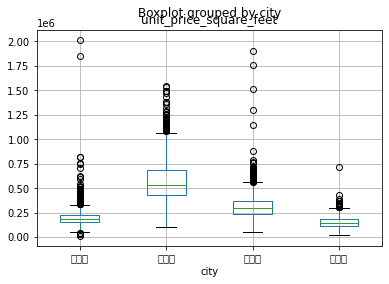

In [152]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
import matplotlib.pyplot as plt
import seaborn as sns
df.boxplot(column=['unit_price_square_feet'],by='city')

<AxesSubplot:xlabel='room_number', ylabel='total_price'>

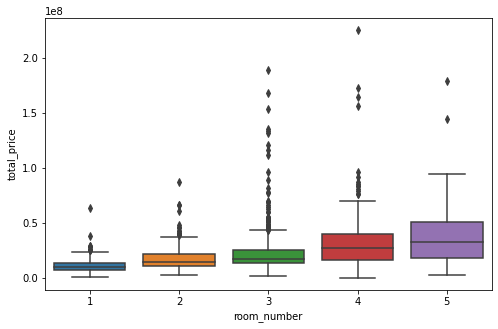

In [157]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，
#並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
fig = plt.figure(figsize = (8, 5))
sns.boxplot(x = "room_number", y = "total_price", data = df[df["city"] == "台北市"])

<AxesSubplot:xlabel='towns_label', ylabel='unit_price_square_feet'>

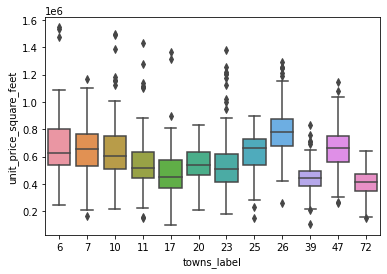

In [161]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['towns_label'] = le.fit_transform(df['towns'])
sns.boxplot(x = 'towns_label', y = 'unit_price_square_feet', data = df[df["city"] == "台北市"])